# Project: InstaBot - II


## InstaBot - Part 2


In [ ]:
# 1.Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
# 1.1.From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
# 1.2.Now Find the number of posts these handles have done in the previous 3 days.
# 1.3.Depict this information using a suitable graph.
# 2.Your friend also needs a list of hashtags that he should use in his posts.
# 2.1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
# 2.2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
# 2.3.Create a csv file with two columns : the word and its frequency
# 2.4.Now, find the hashtags that were most popular among these bloggers
# 2.5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
# 3.You need to also calculate average followers : likes ratio for the obtained handles.
#   Followers : Likes ratio is calculated as follows:
# 3.1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.
# 3.2.Calculate the average likes for a handle.
# 3.3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
# 3.4.Create a bar graph to depict the above obtained information.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [2]:
class InstagramBot():
    
    
    
    ##Constructor
    
    def __init__(self, username, password):
        
        self.driver = webdriver.Firefox(executable_path = 'C:\webdriver\geckodriver.exe')
        self.username = username
        self.password = password
        self.driver.implicitly_wait(10)
    
    
    
    
    ##SignIn
    
    def signIn(self):
        
        self.driver.get('https://www.instagram.com/?hl=en')
        emailInput = self.driver.find_element_by_name('username')
        passwordInput = self.driver.find_element_by_name('password')
        emailInput.send_keys(self.username)
        passwordInput.send_keys(self.password)
        passwordInput.send_keys(Keys.ENTER)
        self.driver.find_element_by_class_name('HoLwm').click()
        time.sleep(2)
    
    
    
    
    ##1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project.
    ##Open the first 10 handles and find the top 5 which have the highest number of followers
    
    def FoodHandlesFollower(self):
        
        self.driver.find_element_by_class_name('Di7vw').click()
        text_box = self.driver.find_element_by_class_name('x3qfX')
        text_box.send_keys('food')
        drp_dwn = self.driver.find_elements_by_class_name('yCE8d')
        a = []
        count = 0
        for i in drp_dwn:
            if('explore' in i.get_attribute('href')):
                continue
            a.append(i.get_attribute('href'))
            count += 1
            if(count == 10):
                break
        self.driver.find_element_by_css_selector('div.aIYm8.coreSpriteSearchClear').click()
        self.b = {}
        for i in a:
            self.driver.get(i)
            self.b[self.driver.find_element_by_css_selector('._7UhW9.fKFbl.yUEEX.KV-D4.fDxYl').text] = self.driver.find_elements_by_class_name('g47SY')[1].get_attribute('title')
        for i in self.b:
            self.b[i] = int(self.b[i].replace(',', ''))
        self.sorted_b = dict( sorted(self.b.items(), key=operator.itemgetter(1),reverse=True))
        self.list1 = []
        self.list2 = []
        count = 0
        for i in self.sorted_b:
            if(count == 5):
                break
            count += 1
            print(i,self.sorted_b[i])
            self.list2.append(self.sorted_b[i])
            self.list1.append(i)
        plt.bar(self.list1,self.list2,width = 0.2)
        plt.xticks(rotation = 90)
        plt.xlabel('Food Handle Name') 
        plt.ylabel('No. of Post') 
        plt.title('No. of Post in the previous 3 days') 
        plt.show()
    
    
    
    
    ##1.2 Now Find the number of posts these handles have done in the previous 3 days.

    def NumberOfPost(self):
        
        base_url = "https://www.instagram.com/"
        self.Post = {}
        for i in self.list1:
            self.driver.get(base_url+i+"/")
            time.sleep(4)
            a = self.driver.find_element_by_class_name('_bz0w')
            a.click()
            count = 0
            while (True):
                time_cal = self.driver.find_element_by_css_selector('time._1o9PC.Nzb55').text.split()
                if(("HOURS" in time_cal) or ("HOUR" in time_cal) or ("hours" in time_cal) or ("hour" in time_cal) or ("MINUTES" in time_cal) or ("MINUTE" in time_cal) or ("minutes" in time_cal) or ("minute" in time_cal) or ("SECONDS" in time_cal) or ("SECOND" in time_cal) or ("seconds" in time_cal) or ("second" in time_cal) or ((("DAY" in time_cal) or ("DAYS" in time_cal) or ("day" in time_cal) or ("days" in time_cal)) and (int(time_cal[0]) < 4))):
                    count += 1
                else:
                    self.driver.find_element_by_class_name('TxciK').click()
                    break
                self.driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
                time.sleep(2)
            self.Post[i] = count
        self.driver.find_element_by_class_name('TxciK').click()
        for i in self.Post:
            print(i,self.Post[i])
    
    
    
    
    ##1.3  Depict this information using a suitable graph.
    
    def Plot_post(self):
        
        Name = []
        No_of_post = []
        for i in self.Post:
            print(i,self.Post[i])
            Name.append(i)
            No_of_post.append(self.Post[i])
        plt.bar(Name,No_of_post,width = 0.2,color = ["blue","red","orange","green","yellow"])
        plt.xticks(rotation = 90)
        plt.xlabel('Food Handle Name') 
        plt.ylabel('No. of Post') 
        plt.title('No. of Post in the previous 3 days') 
        plt.show()
    
    
    
    
    ##2.1  Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

    def scrape_content(self):
        
        base_url = "https://www.instagram.com/"
        self.word = {}
        for i in self.list1:
            self.driver.get(base_url+i+"/")
            time.sleep(4)
            a = self.driver.find_element_by_class_name('_bz0w')
            a.click()
            count = 0
            while (True):
                document = self.driver.find_element_by_xpath('//div[@class = "EtaWk"]//div[@class = "C4VMK"]/span').text
                c = document.strip().split()
                for i in c:
                    if(i in self.word):
                        self.word[i] += 1
                    else:
                        self.word[i] = 1
                count += 1
                if(count == 10):
                    break
                self.driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
                time.sleep(2)
        for i in self.word:
            print(i,self.word[i])
    
    
    
    
    ##2.2  Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
    
    def list_of_word(self):
        
        self.sorted_word = dict( sorted(self.word.items(), key=operator.itemgetter(1),reverse=True))
        for i in self.sorted_word:
            print(i,self.sorted_word[i])
    
    
    
    
    
    ##2.3  Create a csv file with two columns : the word and its frequency

    def create_csv(self):
        
        li_2d=[]
        for i in self.sorted_word:
            s=[]
            s.append(i)
            s.append(self.sorted_word[i])
            li_2d.append(s)
        final_data=np.array(li_2d)
        dataset=pd.DataFrame({'Word':final_data[:,0],'Frequency':final_data[:,1]})
        dataset.to_csv('Frequency.csv',index=False)
        print(dataset)
    
    
    
    
    ##2.4  Now, find the hashtags that were most popular among these bloggers
    
    def hashtag(self):
        
        base_url = "https://www.instagram.com/"
        self.HashTag = {}
        for i in self.list1:
            self.driver.get(base_url+i+"/")
            time.sleep(4)
            a = self.driver.find_element_by_class_name('_bz0w')
            a.click()
            count = 0
            while (True):
                for i in self.driver.find_elements_by_css_selector('a.xil3i'):
                    if(i.text in self.HashTag):
                        self.HashTag[i.text] += 1
                    else:
                        self.HashTag[i.text] = 1
                count += 1
                if(count == 10):
                    break
                self.driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
                time.sleep(2)
        self.sorted_HashTag = dict( sorted(self.HashTag.items(), key=operator.itemgetter(1),reverse=True))
        count = 0
        for i in self.sorted_HashTag:
            if(count == 10):
                break
            count += 1
            print(i,self.sorted_HashTag[i])


            
            
    ##2.5  Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.    
    
    def Plot_pie(self):
        
        number = []
        hashtags = []
        count = 0
        for i in self.sorted_HashTag:
            hashtags.append(i)
            number.append(self.sorted_HashTag[i])
            count += 1
            if(count == 5):
                break
        plt.pie(number,labels = hashtags,autopct = '%1.1f%%')
        plt.axis("equal")
        plt.title('Top 5 hashtags') 
        plt.show()
    
    
    
    
    ##3.1  Find out the likes of the top 10 posts of the 5 handles obtained earlier.
    
    def likes(self):
        
        base_url = "https://www.instagram.com/"
        self.Likes = {}
        for i in self.list1:
            self.driver.get(base_url+i+"/")
            time.sleep(4)
            a = self.driver.find_element_by_class_name('_bz0w')
            a.click()
            count = 0
            a = []
            while True : 
                try : 
                    likes = self.driver.find_element_by_css_selector('button.sqdOP.yWX7d._8A5w5 span').text
                    likes = int(likes.replace(',',''))
                    a.append(likes)
        
                except NoSuchElementException :
                    self.driver.find_element_by_class_name('vcOH2').click()
                    likes = self.driver.find_element_by_css_selector('div.vJRqr span').text
                    likes = int(likes.replace(',',''))
                    a.append(likes)
                    self.driver.find_element_by_class_name('QhbhU').click()
                count += 1
                if(count == 10):
                    self.Likes[i] = a
                    break
                self.driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
                time.sleep(2)
        for i in self.Likes:
            print(i,self.Likes[i])
    
    
    
    
    ##3.2  Calculate the average likes for a handle.

    def AverageLikesForHandles(self):
        
        self.Likes_average = {}
        for i in self.Likes:
            sum1 = 0
            for j in self.Likes[i]:
                sum1 += j
            sum1 /= 10
            self.Likes_average[i] = sum1
        x = []
        z = []
        for i in self.Likes_average:
            print(i,self.Likes_average[i])
            x.append(i)
            z.append(self.Likes_average[i])
        self.driver.find_element_by_class_name('TxciK').click()
        plt.bar(x,z,width = 0.2,color = ["blue","red","green","orange","purple"])
        plt.xticks(rotation = 90)
        plt.xlabel('Name') 
        plt.ylabel('Average Likes') 
        plt.title('Average Likes For Handles') 
        plt.show()
    
    
    
    
    ##3.3  Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

    def AverageLikeRatio(self):
        
        self.b2 = []
        self.b1 = []
        count = 0
        for i in self.sorted_b:
            if(count == 5):
                break
            count += 1
            self.b2.append(i)
            self.b1.append(self.sorted_b[i])
        self.Likes_Follow_average = {}
        count = 0
        self.l = []
        for i in self.Likes_average:
            sum1 = 0
            sum1 = self.b1[count] / self.Likes_average[i]
            count += 1
            self.Likes_Follow_average[i] = sum1
            self.l.append(sum1)
        for i in self.Likes_Follow_average:
            print(i,self.Likes_Follow_average[i])
    
    
    
    
    ##3.4  Create a bar graph to depict the above obtained information.

    def barGraph(self):
        
        plt.bar(self.b2,self.l,width = 0.2,color = ["blue","red","green","orange","purple"])
        plt.xticks(rotation = 90)
        plt.xlabel('Name') 
        plt.ylabel('Average Likes') 
        plt.title('Average followers like ratio') 
        plt.show()
      
    
    
    ##Quit() 
    
    def driver_quit(self):
        
        self.driver.quit()

In [3]:
 ##SignIn

bot = InstagramBot('nikhildadhich1997', 'varalika1997')
bot.signIn()

foodnetwork 10126407
buzzfeedfood 3772991
foodandwine 3307203
foodinsider 2188895
yourfoodlab 905903


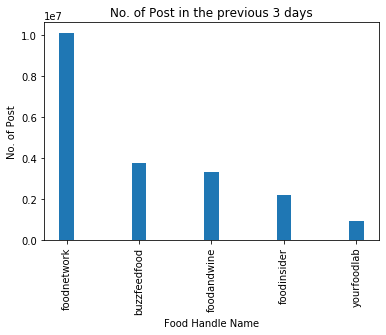

In [4]:
##1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project.
    ##Open the first 10 handles and find the top 5 which have the highest number of followers

bot.FoodHandlesFollower()

In [5]:
##1.2 Now Find the number of posts these handles have done in the previous 3 days.

bot.NumberOfPost()

foodnetwork 46
buzzfeedfood 0
foodandwine 10
foodinsider 2
yourfoodlab 2


foodnetwork 46
buzzfeedfood 0
foodandwine 10
foodinsider 2
yourfoodlab 2


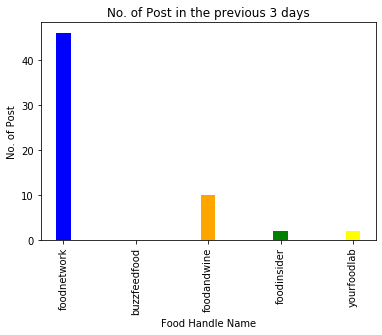

In [6]:
##1.3  Depict this information using a suitable graph.

bot.Plot_post()

In [7]:
##2.1  Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

bot.scrape_content()

Leave 1
them 4
in 60
the 106
pans 1
for 42
10 1
to 58
15 2
minutes 3
before 4
unmolding, 1
then 2
place 4
on 31
a 45
rack 1
cool 1
completely 1
frosting 1
👍 1
This 8
is 27
must 1
when 3
you 22
take 6
@chefdphillips’ 1
Coconut 1
Cake 5
class 4
@FoodNetworkKitchen 5
app! 1
The 9
Office 1
"It 1
Is 1
Your 1
Birthday" 1
Happy 2
15th 1
Anniversary 1
@theofficenbc 1
💼 1
We 6
know 7
there's 1
ALWAYS 1
theme 1
😉Tag 1
Dwight 1
your 16
Jim 1
so 5
they 7
can 14
see 6
this! 1
Thoughts 1
joining 1
Party 1
Planning 1
Committee, 1
@letterpressbakery? 1
Class 1
of 37
Day: 2
Confetti 1
Ice 1
Cream 1
Sundae 1
Cupcakes 2
🧁 1
+ 2
ice 1
cream 1
cones 1
= 2
dessert 1
mashup 1
our 24
dreams! 1
Check 1
out 10
@ana_jo’s 1
app. 2
One-Tray 1
Chicken 3
with 27
Rice 1
Pilaf 1
🤤 1
@chefsymon 1
made 7
this 24
live 1
@foodnetworkkitchen's 1
Facebook 1
page 2
tonight! 1
Get 1
questions 2
ready 2
because 2
he'll 1
be 14
back 3
again 1
tomorrow 1
at 13
5|4c 1
making 4
Mac 1
and 94
"Cheese" 1
🍽 1
#SymonDinners 1
Amedei 1


customers 1
about 3
why 1
it’s 3
worth 1
wait. 1
at: 1
@teddysredtacos 1
#teddys 1
#redtacos 1
Emilio's 1
Ballato 2
bolognese 1
NYC 1
@emiliosballato, 1
founded 1
1956, 1
popular 1
spot 1
among 1
celebrities 1
Italian 3
New 2
York 1
City. 1
walls 1
decorated 1
pictures 1
autographs 1
stars 1
such 2
Rihanna, 1
Jon 1
Bon 1
Jovi, 1
Lenny 1
Kravitz, 1
former 1
President 1
Barack 1
Obama. 1
no-reservations 1
restaurant 2
known 1
its 1
traditional 1
American 1
classics 1
tagliatelle 1
alla 1
Bolognese 1
veal 1
Parmesan. 1
Taryn 1
Varricchio 1
headed 1
Emilio’s 1
famed 1
Nolita 1
created 1
haven 1
regular 1
Yorkers 1
faces 1
alike. 1
#nyc 1
#nycfoodies 1
#Italian 1
25 1
Must-try 1
Japan 1
Ultimate 1
List 1
Japanese 1
vary 1
depending 1
region, 1
common 1
throughout 1
country 1
open-air 1
markets 1
street 2
snacks 1
taiyaki 1
fish-shaped 1
treats 1
filled 2
red-bean 1
paste 1
fluffy 1
soufflé 1
tako 1
tamago 1
grilled 1
octopus 1
stuffed 1
quail 1
egg. 1
traveled 1
south 1
Tokyo 1
Okinawa 1
Is

In [8]:
##2.2  Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

bot.list_of_word()

the 106
and 94
in 60
to 58
a 45
. 43
for 42
of 37
on 31
is 27
with 27
our 24
this 24
I 24
you 22
are 20
your 16
recipe 16
more 15
it 15
can 14
be 14
have 14
at 13
as 13
best 12
that 12
we 12
by 12
food 12
from 11
link 11
out 10
The 9
has 9
Chef 9
@sanjyotkeer 9
home 9
This 8
how 8
their 8
favorite 8
up 8
or 8
bio 8
#FoodInsider 8
know 7
they 7
made 7
her 7
like 7
foodie 7
around 7
@bringme 7
over 7
my 7
one 7
all 7
Tap 7
been 7
but 7
which 7
me 7
stay 7
#foodie 7
#indiancuisine 7
take 6
We 6
see 6
while 6
dishes 6
let 6
his 6
some 6
pasta 6
dal 6
Cake 5
@FoodNetworkKitchen 5
so 5
super 5
cook 5
simple 5
need 5
try 5
#food 5
| 5
tacos 5
#sanjyotkeer 5
them 4
before 4
place 4
class 4
making 4
app 4
way 4
want 4
makes 4
adventures 4
✈️ 4
📷: 4
Editor 4
healthy 4
it. 4
also 4
who 4
if 4
an 4
any 4
time 4
than 4
easy 4
restaurants 4
just 4
— 4
hands 4
these 4
Tacos 4
masala 4
was 4
kitchen 4
am 4
do 4
not 4
prepped 4
#streetfood 4
pav 4
#recipe 4
challenge 4
Dabeli 4
minutes 3
when 3
Chicken

In [9]:
##2.3  Create a csv file with two columns : the word and its frequency

bot.create_csv()

              Word Frequency
0              the       106
1              and        94
2               in        60
3               to        58
4                a        45
...            ...       ...
1389         Bhaji         1
1390           DIY         1
1391       Lettuce         1
1392         Wraps         1
1393  #yourfoodlab         1

[1394 rows x 2 columns]


In [10]:
##2.4  Now, find the hashtags that were most popular among these bloggers

bot.hashtag()

#BuzzFeast 10
#FoodInsider 8
#foodie 7
#indiancuisine 7
#food 6
#sanjyotkeer 5
#streetfood 4
#recipe 4
#recipes 3
#mumbaifoodie 3


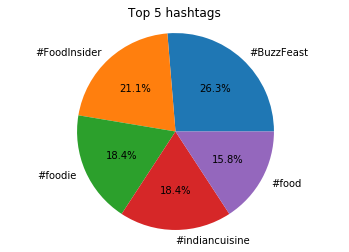

In [11]:
##2.5  Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.    

bot.Plot_pie()

In [12]:
##3.1  Find out the likes of the top 10 posts of the 5 handles obtained earlier.

bot.likes()

foodnetwork [2266, 10945, 18686, 12216, 59528, 4495, 9123, 11401, 6548, 34681]
buzzfeedfood [4061, 2779, 4395, 10348, 4973, 3302, 5744, 2577, 4765, 7223]
foodandwine [2704, 2420, 9870, 22506, 4715, 20009, 7657, 9495, 10251, 5827]
foodinsider [15489, 7586, 19447, 13967, 3832, 29404, 24769, 13612, 18977, 39475]
yourfoodlab [4709, 21068, 16651, 22042, 13373, 6682, 16005, 17795, 22612, 6994]


foodnetwork 16988.9
buzzfeedfood 5016.7
foodandwine 9545.4
foodinsider 18655.8
yourfoodlab 14793.1


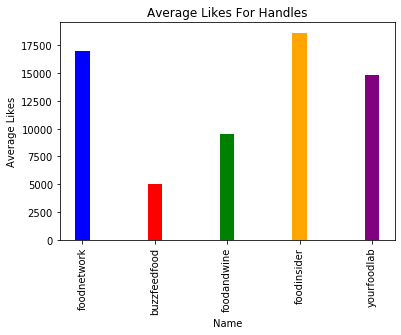

In [13]:
##3.2  Calculate the average likes for a handle.

bot.AverageLikesForHandles()

In [14]:
##3.3  Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

bot.AverageLikeRatio()

foodnetwork 596.0601922431705
buzzfeedfood 752.0862319851695
foodandwine 346.47086554780316
foodinsider 117.33053527589276
yourfoodlab 61.23821240983972


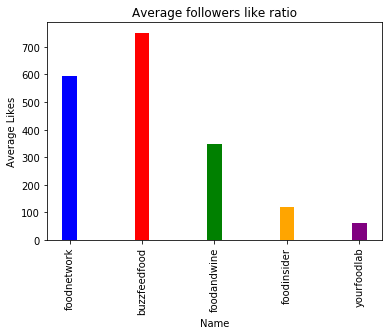

In [15]:
##3.4  Create a bar graph to depict the above obtained information.

bot.barGraph()

In [ ]:
##quit()


bot.driver_quit()